# **Proyecto Final**
*Modelo predictivo de Violencia de género en mujeres de Jalisco, (15+ en relaciones)*


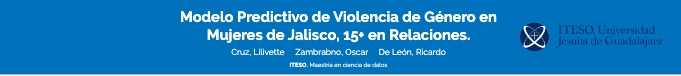
---


>**Team Members:**
*   Cruz Aguirre, Lilivette
*   Zambrano Aguirre, Oscar
*   De Leon Flores, Ricardo



In [1]:
# Montando el drive (conexión)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Lectura de base de datos**

In [8]:
import pandas as pd
import glob


# Ruta al directorio que contiene los archivos CSV
directorio_csv = '/content/drive/MyDrive/maestria/modelado/ENDIREH2021'

# Patrón de archivos CSV que quieres leer (puedes ajustarlo según tus necesidades)
patron_csv = '*.csv'

# Obtén la lista de archivos CSV en el directorio que coinciden con el patrón
archivos_csv = glob.glob(f'{directorio_csv}/{patron_csv}')


#Lista de archivos a trabajar
archivosSeleccionados = ['TB_SEC_IV.csv','TB_SEC_III.csv','TSDem.csv','TVIV.csv','TB_VD.csv','TB_SEC_XV.csv','TB_SEC_XIV.csv','TB_SEC_XIII_2.csv','TB_SEC_XIII.csv','TB_SEC_XII.csv']

archivosSeleccionados = ['/content/drive/MyDrive/maestria/modelado/ENDIREH2021/' + elemento for elemento in archivosSeleccionados]

archivosFinales = [file for file in archivos_csv if file in archivosSeleccionados]

In [20]:
# Crea un diccionario para almacenar los dataframes
dataframes = {}

# Lee cada archivo CSV y carga los datos en un dataframe
for archivo_csv in archivosFinales:
    # Obtén el nombre del archivo sin la ruta y la extensión
    nombre_df = archivo_csv.split('/content/drive/MyDrive/maestria/modelado/ENDIREH2021/')[-1].split('.')[0]

    # Lee el archivo CSV y almacena los datos en el diccionario
    dataframes[nombre_df] = pd.read_csv(archivo_csv, encoding='ISO-8859-1',dtype=str)

    print('Dataframe:', nombre_df)

    camposTexto = ['ID_VIV','ID_PER','UPM','NOM_ENT','CVE_MUN','NOM_MUN','T_INSTRUM','P14_8_10E','P13_16_16E','P4_4','NOMBRE']
    # Iterar las columnas y cambiar el tipo de dato a int64 si no está en la lista de los campos que son string
    for columna in dataframes[nombre_df].columns:
        if columna not in camposTexto:
            dataframes[nombre_df][columna] = pd.to_numeric(dataframes[nombre_df][columna], errors='coerce')

Dataframe: TB_SEC_III
Dataframe: TB_SEC_IV
Dataframe: TB_SEC_XII
Dataframe: TB_SEC_XIV
Dataframe: TB_SEC_XIII_2
Dataframe: TB_SEC_XIII
Dataframe: TB_VD
Dataframe: TB_SEC_XV
Dataframe: TVIV
Dataframe: TSDem


In [12]:
#Trabajar los dataframes
#%%

# T_INSTRUM: Variable que refiere el tipo de cuestionario que se le aplicó al mujer elegida.
#   'A1' CASADA O UNIDA Con pareja residente
#   'A2' CASADA O UNIDA Con pareja ausente temporal
#   'B1' SEPARADA, DIVORCIADA O VIUDA Separada o divorciada
#   'B2' SEPARADA, DIVORCIADA O VIUDA Viuda
#   'C1' SOLTERA Con novio o pareja o exnovio o expareja
#   'C2' SOLTERA Nunca ha tenido novio

In [23]:
#%%TVIV I. Características de la Vivienda y Hogares en la Vivienda

#Definir las condiciones
condicionEdo = dataframes['TVIV']['NOM_ENT'] == 'JALISCO'
condicion1 = dataframes['TVIV']['COD_RES'] == 1 #Entrevista completa con mujer de 15 o más años

#Campos a utilizar
campos=['ID_VIV','P1_4_9','P1_5','P1_6','P1_7','P1_8','ESTRATO']

#COD_RES: Resultado de la visita a la vivienda Rango: (1-2) ([1, 2]:Entrevista completa con mujer de 15 o más años, Entrevista completa sin mujer de 15 o más años)
#P1_4_9: Bienes en la vivienda: servicio de internet Rango: (1-2) ([1, 2]:Sí, No)
#P1_5: Agua potable Rango: (1-6) ([1, 2, 3, 4, 5, 6]:agua entubada dentro de la vivienda?, agua entubada fuera de la vivienda, pero dentro del terreno?, agua entubada de una llave pública (o hidrante)?, agua entubada que acarrea de otra vivienda?, agua de pipa?, agua de un pozo, río, arroyo, lago u otro?)
#P1_6: Drenaje Rango: (1-5) ([1, 2, 3, 4, 5]:la red pública?, una fosa séptica?, una tubería que va a dar a una barranca o grieta?, una tubería que va a dar a un río, lago o mar?, No tiene drenaje?)
#P1_7: Residentes habituales Rango: () ([]:)
#P1_8: Gasto compartido Rango: (1-2) ([1, 2]:Sí, No)
#ESTRATO: Estrato Rango: (1-4) ([1, 2, 3, 4]:Bajo, Medio bajo, Medio alto, Alto)


# Aplicar las condiciones
TVIV = dataframes['TVIV'][campos].loc[condicionEdo & condicion1]

In [24]:
#%%TSDem II. Características Sociodemográficas de Residentes de la Vivienda

#Definir las condiciones
condicionEdo = dataframes['TSDem']['NOM_ENT'] == 'JALISCO'
condicion1 = dataframes['TSDem']['COD_M15'] == 1 #Código asignado a mujeres con 15 años y más
condicion2 = dataframes['TSDem']['CODIGO'] == 1 # Código asignado a la mujer seleccionada de 15 años y más
condicion3 = dataframes['TSDem']['SEXO'] == 2 # Mujer

#Campos a utilizar
campos=['ID_VIV','ID_PER','EDAD','NIV','GRA','P2_8','P2_9','P2_10','P2_11','P2_13']

#EDAD: Edad Rango: (0-99) ([0, 97, 98, 99]:Menos de un año, 97 o más años, Edad no especificada en personas de 15 años o más, Edad no especificada)
#NIV: Nivel Rango: (0-11) ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:Ninguno, Preescolar, Primaria, Secundaria, Preparatoria o bachillerato, Estudios técnicos o comerciales con primaria terminada, Estudios técnicos o comerciales con secundaria terminada, Estudios técnicos o comerciales con preparatoria terminada, Normal con primaria o secundaria terminada, Normal licenciatura, Licenciatura o profesional, Posgrado (Especialidad, Maestría o Doctorado))
#GRA: Grado Rango: (0-9) ([9]:No especificado)
#P2_8: Alfabetismo Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P2_9: Asistencia escolar Rango: (1-2) ([1, 2]:Sí, No)
#P2_10: Pertenencia indígena Rango: (1-8) ([1, 2, 3, 8]:Sí, Sí, en parte, No, No sabe)
#P2_11: Lengua indígena Rango: (1-2) ([1, 2]:Sí, No)
#P2_13: Condición de actividad Rango: (1-2) ([1, 2]:Sí, No)
#COD_M15: Código Mujer 15 años y más Rango: (1-1) ([1]:Código asignado a mujeres con 15 años y más)
#CODIGO: Código de la mujer seleccionada Rango: (0-1) ([0, 1]:Código asignado a la mujeres no seleccionada de 15 años y más, Código asignado a la mujer seleccionada de 15 años y más)

# Aplicar las condiciones
#TSDem = dataframes['TSDem'][campos].loc[condicionEdo & condicion1 & condicion2 & condicion3]
TSDem = dataframes['TSDem'][campos].loc[condicionEdo]

In [25]:
#%%TB_SEC_III III. Elegibilidad y Verificación de Situación Conyugal de la Mujer Elegida de 15 años o más

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_III']['NOM_ENT'] == 'JALISCO'
# Todas las A1 tienen valor 1 para P3_2
condicion1 = dataframes['TB_SEC_III']['P3_2'] == 1

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P3_1']

#P3_1: Verificación de la situación conyugal Rango: (1-6) ([1, 2, 3, 4, 5, 6]:vive en unión libre?, está separada?, está divorciada?, es viuda?, está casada?, está soltera?)
#P3_2: Condición de cohabitación (casadas o unidas) Rango: (1-2) ([1, 2]:Sí, No)

# Aplicar las condiciones
TB_SEC_III = dataframes['TB_SEC_III'][campos].loc[condicionEdo&condicion1]
TB_SEC_III = TB_SEC_III[TB_SEC_III['T_INSTRUM'].isin(['A1'])]

TB_SEC_III = TB_SEC_III.drop('T_INSTRUM', axis=1)

In [26]:
#%%TB_SEC_IV IV. Ingresos y recursos

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_IV']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P4AB_1','P4BC_1','P4BC_2','P4C_1','P4BC_3','P4BC_4','P4BC_5','P4_1','P4_2','P4_2_1','P4_3','P4_5_AB','P4_5_1_AB','P4_6_AB','P4_7_AB','P4_8_1','P4_8_2','P4_8_3','P4_8_4','P4_8_5','P4_8_6','P4_8_7','P4_9_1','P4_9_2','P4_9_3','P4_9_4','P4_9_5','P4_9_6','P4_9_7','P4_10_2_1','P4_10_2_2','P4_10_2_3','P4_10_3_1','P4_10_3_2','P4_10_3_3','P4_11']

#P4AB_1: Tipo de unión con la pareja o expareja Rango: (1-4) ([1, 2, 3, 4]:viven en unión libre?, Se casaron solo por la iglesia?, Se casaron por la iglesia y por el civil?, Se casaron solo por el civil?)
#P4BC_1: Edad de la pareja o expareja Rango: (12-99) ([97, 98, 99]:97 O MÁS AÑOS, NO SABE O NO SE ACUERDA, No especificado)
#P4BC_2: Nivel de escolaridad de la pareja o expareja Rango: (0-98) ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 98]:Ninguno, Preescolar, Primaria, Secundaria, Preparatoria o bachillerato, Estudios técnicos o comerciales con primaria terminada, Estudios técnicos o comerciales con secundaria terminada, Estudios técnicos o comerciales con preparatoria terminada, Normal con primaria o secundaria terminada, Normal licenciatura, Licenciatura o profesional, Posgrado (Especialidad, Maestría o Doctorado), No sabe)
#P4C_1: Asistencia escolar actual de la pareja o expareja Rango: (1-8) ([1, 2, 8]:Sí, No, No sabe)
#P4BC_3: Consideración de la pareja o expareja de ser indígena. Rango: (1-8) ([1, 2, 3, 8]:Sí, Sí, en parte, No, No sabe)
#P4BC_4: Pareja o expareja hablante de lengua indígena Rango: (1-2) ([1, 2]:Sí, No)
#P4BC_5: Pareja o expareja también hablante de español Rango: (1-2) ([1, 2]:Sí, No)
#P4_1: Situación laboral Rango: (1-2) ([1, 2]:Sí, No)
#P4_2: Salario Rango: (0-999999)
#P4_2_1: Temporalidad del salario de la informante Rango: (1-9) ([1, 2, 3, 8, 9]:A la semana, A la quincena, Al mes, No sabe, No especificado)
#P4_3: Ingreso económico de la pareja o expareja de la informante Rango: (1-9) ([1, 2, 8, 9]:Sí, No, No sabe, No especificado)
#P4_5_AB: Ingreso económico de la pareja o expareja. Rango: (0-999999) ([]:)
#P4_5_1_AB: Temporalidad del salario de la pareja o expareja de la informante Rango: (1-9) ([1, 2, 3, 8, 9]:A la semana, A la quincena, Al mes, No sabe, No especificado)
#P4_6_AB: Aporte económico por parte de la pareja o expareja de la informante Rango: (1-9) ([1, 2, 3, 9]:Sí, No, No tienen hijos en común o ya son grandes, No especificado)
#P4_7_AB: Cantidad de la aportación económica Rango: (999997-999999) ([]:)
#P4_8_1: Ingreso por jubilación o pensión Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_2: Ingreso por parte de familiares o conocidos que vivan en Estados Unidos de América Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_3: Ingreso por parte de familiares o conocidos que viven dentro del país. Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_4: Ingreso por beca escolar para sus hijos e hijas Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_5: Ingreso por beca escolar propia Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_6: Ingreso por pertenecer a algún programa del gobierno Rango: (1-2) ([1, 2]:Sí, No)
#P4_8_7: Ingreso por otro medio Rango: (1-2) ([1, 2]:Sí, No)
#P4_9_1: Cantidad recibida al mes por jubilación o pensión Rango: (999997-999999) ([]:)
#P4_9_2: Cantidad recibida al mes por parte de familiares o conocidos que viven en EUA Rango: (999997-999998) ([]:)
#P4_10_2_1: Aporte económico por parte del primer familiar o conocido que vive en EUA. Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_10_2_2: Aporte económico por parte del segundo familiar o conocido que vive en EUA. Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_10_2_3: Aporte económico por parte del tercer familiar o conocido que vive en EUA. Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_9_3: Cantidad recibida al mes por parte de familiares o conocidos que viven en México Rango: (999997-999999) ([]:)
#P4_10_3_1: Aporte económico por parte del primer familiar o conocido que vive dentro del país Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_10_3_2: Aporte económico por parte del segundo familiar o conocido que vive dentro del país Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_10_3_3: Aporte económico por parte del tercer familiar o conocido que vive dentro del país Rango: (1-5) ([1, 2, 3, 4, 5]:Padre o madre, Hija(s)/hijo(s), Hermana(s)/hermano(s), Otros familiares, Personas conocidas)
#P4_9_4: Cantidad recibida al mes por becas escolares para sus hijos e hijas Rango: (0-999999) ([]:)
#P4_9_5: Cantidad recibida al mes por becas escolares para la informante Rango: (999997-999999) ([]:)
#P4_9_6: Cantidad recibida al mes por programas del gobierno Rango: (999997-999999) ([]:)
#P4_9_7: Cantidad recibida al mes por otro tipo de situación Rango: (999997-999999) ([]:)
#P4_11: Autonomía para usar los recursos monetarios en lo que se desee Rango: (1-2) ([1, 2]:Sí, No)


# Aplicar las condiciones
TB_SEC_IV = dataframes['TB_SEC_IV'][campos].loc[condicionEdo]
TB_SEC_IV = TB_SEC_IV[TB_SEC_IV['T_INSTRUM'].isin(['A1'])]

#Combinar si hay ingresos extra en una sola variable
ingresos=['P4_8_1','P4_8_2','P4_8_3','P4_8_4','P4_8_5','P4_8_6','P4_8_7']
TB_SEC_IV['P4_8'] = TB_SEC_IV[ingresos].apply(lambda row: 1 if any(row == 1) else 2, axis=1)

#Combinar el monto de los ingresos extra en una sola variable
montos=['P4_9_1','P4_9_2','P4_9_3','P4_9_4','P4_9_5','P4_9_6','P4_9_7','P4_10_2_1','P4_10_2_2','P4_10_2_3','P4_10_3_1','P4_10_3_2','P4_10_3_3']
TB_SEC_IV['P4_9'] = TB_SEC_IV[montos].sum(axis=1)

campos.append('P4_8')
campos.append('P4_9')
campos.remove('T_INSTRUM')

#TB_SEC_IV final
TB_SEC_IV= TB_SEC_IV[[campo for campo in campos if campo not in ingresos and campo not in montos]]

In [27]:
#%%TB_SEC_XII XII. Familia de origen  NO SE UTILIZARA!!!

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_XII']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P12_1','P12_2','P12_3','P12_4','P12_5','P12_6','P12_7','P12_8','P12_9','P12_10','P12_11','P12_14_1','P12_14_2','P12_14_3','P12_14_4','P12_14_5','P12_14_6']

#P12_1: Lugar de nacimiento Rango: (1-4) ([1, 2, 3, 4]:aquí, en este estado?, en otro estado del país?, en los Estados Unidos de América?, en otro país?)
#P12_2: Lugar donde vivió la mayor parte de su infancia Rango: (1-4) ([1, 2, 3, 4]:en el mismo estado donde nació?, en otro estado del país?, en Estados Unidos de América?, en otro país?)
#P12_3: Tipo de localidad donde vivió su infancia Rango: (1-4) ([1, 2, 3, 4]:¿una ranchería, pueblo o comunidad pequeña?, ¿un pueblo mediano?, ¿una ciudad pequeña?, ¿una ciudad grande?)
#P12_4: Frecuencia de golpes en su hogar de la infancia Rango: (1-3) ([1, 2, 3]:de vez en cuando?, seguido?, No había golpes)
#P12_5: Frecuencia de agresiones verbales en su hogar de la infancia Rango: (1-3) ([1, 2, 3]:de vez en cuando?, seguido?, No había insultos ni ofensas)
#P12_6: Frecuencia de golpes en la infancia Rango: (1-3) ([1, 2, 3]:de vez en cuando?, seguido?, No le pegaban)
#P12_7: Frecuencia de agresiones verbales en su infancia Rango: (1-3) ([1, 2, 3]:de vez en cuando?, seguido?, No la insultaban ni la ofendían)
#P12_8: Frecuencia de golpes en la infancia de su pareja o expareja Rango: (1-8) ([1, 2, 3, 8]:de vez en cuando?, seguido?, No le pegaban ni lo insultaban, No sabe)
#P12_9: Frecuencia de golpes hacia la madre de su pareja o expareja, en su infancia Rango: (1-8) ([1, 2, 8]:Sí le pegaba, No le pegaba, No sabe)
#P12_10: Frecuencia de insultos a sus hijos por su pareja o expareja Rango: (1-4) ([1, 2, 3, 4]:de vez en cuando?, seguido?, No les insulta, No tiene hijos(as))
#P12_11: Frecuencia de golpes a sus hijos por su pareja o expareja Rango: (1-4) ([1, 2, 3, 4]:de vez en cuando?, seguido?, No les pega, No tiene hijos(as))
#P12_14_1: Manoseos o tocamientos en la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)
#P12_14_2: Exhibicionismo sexual en la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)
#P12_14_3: Obligación de ver material de tipo sexual durante la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)
#P12_14_4: Intento de violación sexual durante la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)
#P12_14_5: Violación sexual en la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)
#P12_14_6: Obligación de realizar actos sexuales a cambio de dinero o regalos en la infancia Rango: (1-8) ([1, 2, 8]:Sí, No, No recuerda)


# Aplicar las condiciones
TB_SEC_XII = dataframes['TB_SEC_XII'][campos].loc[condicionEdo]
TB_SEC_XII = TB_SEC_XII[TB_SEC_XII['T_INSTRUM'].isin(['A1'])]
TB_SEC_XII = TB_SEC_XII.drop('T_INSTRUM', axis=1)

In [28]:
#%%TB_SEC_XIII XIII. Vida en Pareja

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_XIII']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P13_1','P13_2','P13_6','P13_7','P13_8','P13_9','P13_10','P13_11','P13_12','P13_13','P13_14','P13_15AB']

#P13_1: Número de hijos Rango: (0-99) ([]:)
#P13_2: Edad al nacer el primer hijo Rango: (10-99) ([98, 99]:No recuerda, No especificado)
#P13_6: Edad al tener su primera relación sexual Rango: (0-999) ([0, 98, 99, 999]:No ha tenido relaciones sexuales, No recuerda, No quiso responder, No especificado)
#P13_7: Consentimiento de la primera relación sexual Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_8: Edad al iniciar última relación de pareja Rango: (0-99) ([0, 98, 99]:No hubo noviazgo, No recuerda, No especificado)
#P13_9: Edad al comienzo de la vida en matrimonio o concubinato Rango: (98-99) ([98, 99]:No recuerda, No especificado)
#P13_10: Edad de la pareja al comienzo de la vida en matrimonio o concubinato Rango: (10-99) ([98, 99]:No recuerda, No especificado)
#P13_11: Razón de la unión con la expareja Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:se embarazó y la obligaron a casarse?, se embarazó y decidieron casarse o vivir juntos?, se la "robaron" en contra de su voluntad y tuvo que casarse o unirse?, a cambio de dinero, regalos o propiedades sus padres arreglaron su matrimonio o unión?, quería irse o salirse de su casa?, así lo quisieron y decidieron los dos?, Otra)
#P13_12: Personas con las que vivía en el matrimonio o concubinato Rango: (1-4) ([1, 2, 3, 4]:solos como pareja, con o sin hijos(as)?, con sus padres u otros familiares de usted?, con los padres u otros familiares de su esposo (ex-esposo) o pareja (ex-pareja)?, Otro)
#P13_13: Número de veces casada o unida, contando su actual unión o matrimonio Rango: (1-9) ([]:)
#P13_14: Edad al momento de su primer matrimonio o unión libre Rango: (98-99) ([98, 99]:No recuerda, No especificado)
#P13_15AB: Edad de la pareja al momento de su primer matrimonio o unión libre Rango: (10-99) ([98, 99]:No recuerda, No especificado)


# Aplicar las condiciones
TB_SEC_XIII = dataframes['TB_SEC_XIII'][campos].loc[condicionEdo]
TB_SEC_XIII = TB_SEC_XIII[TB_SEC_XIII['T_INSTRUM'].isin(['A1'])]
TB_SEC_XIII = TB_SEC_XIII.drop('T_INSTRUM', axis=1)

In [29]:
#%%TB_SEC_XIII_2 XIII.I. Tensiones y conflictos

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_XIII_2']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P13_1_3_1','P13_1_3_2','P13_1_3_3','P13_1_3_4','P13_1_3_5','P13_1_3_6','P13_1_3_7','P13_1_3_8','P13_1_3_9','P13_1_3_10','P13_1_3_11','P13_1_3_12','P13_1_5']

#P13_1_3_1: Consecuencia del enojo de la pareja o expareja hacia la informante: indiferencia Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_2: Consecuencia del enojo de la pareja o expareja hacia la informante: discutir o gritar Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_3: Consecuencia del enojo de la pareja o expareja hacia la informante: ofender o insultar Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_4: Consecuencia del enojo de la pareja o expareja hacia la informante: golpear o aventar cosas Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_5: Consecuencia del enojo de la pareja o expareja hacia la informante: empujar o jalonear Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_6: Consecuencia del enojo de la pareja o expareja hacia la informante: amenazar con golpearla o abandonarla Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_7: Consecuencia del enojo de la pareja o expareja hacia la informante: golpear o agredir físicamente Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_8: Consecuencia del enojo de la pareja o expareja hacia la informante: dejar de dar dinero para los gastos Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_9: Consecuencia del enojo de la pareja o expareja hacia la informante: irse o ausentarse Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_10: Consecuencia del enojo de la pareja o expareja hacia la informante: hablar o platicar para resolver el conflicto Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_11: Consecuencia del enojo de la pareja o expareja hacia la informante: Otro Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_3_12: Consecuencia del enojo de la pareja o expareja hacia la informante: No hay Rango: (1-9) ([1, 2, 9]:Sí, No, No especificado)
#P13_1_5: Percepción de cambio en la frecuencia de problemas o conflictos en el ámbito de pareja Rango: (1-9) ([1, 2, 3, 4, 5, 9]:aumentaron?, disminuyeron?, se resolvieron?, se mantienen igual?, Nunca ha habido conflictos, No especificado)

# Aplicar las condiciones
TB_SEC_XIII_2 = dataframes['TB_SEC_XIII_2'][campos].loc[condicionEdo]
TB_SEC_XIII_2 = TB_SEC_XIII_2[TB_SEC_XIII_2['T_INSTRUM'].isin(['A1'])]
TB_SEC_XIII_2 = TB_SEC_XIII_2.drop('T_INSTRUM', axis=1)

In [30]:
#%%TB_SEC_XIV XIV. Relación actual o última

#Para este dataset se pueden categorizar los tipos de violencia

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_XIV']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P14_1_11','P14_1_12','P14_1_24AB','P14_1_35AB','P14_1_36AB','P14_1_37AB','P14_1_38AB']

#P14_1_11: Invisibilización y falta de cariño Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_12: Afirmación de engaño Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_24AB: Inconformidad por quehaceres domésticos Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_35AB: Mal uso de recursos económicos para el hogar Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_36AB: Incumplimiento de obligaciones económicas Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_37AB: Limitación de gastos Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)
#P14_1_38AB: Reclamo por gastos Rango: (1-9) ([1, 2, 3, 4, 9]:muchas veces?, pocas veces?, una vez?, No ocurrió, No especificado)



# Aplicar las condiciones
TB_SEC_XIV = dataframes['TB_SEC_XIV'][campos].loc[condicionEdo]
TB_SEC_XIV = TB_SEC_XIV[TB_SEC_XIV['T_INSTRUM'].isin(['A1'])]
TB_SEC_XIV = TB_SEC_XIV.drop('T_INSTRUM', axis=1)

In [31]:
#%%TB_SEC_XV XV. Decisiones y libertad personal

#Definir las condiciones
condicionEdo = dataframes['TB_SEC_XV']['NOM_ENT'] == 'JALISCO'

#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','P15_1AB_1','P15_1AB_2','P15_1AB_3','P15_1AB_4','P15_1AB_5','P15_1AB_6','P15_1AB_7','P15_1AB_8','P15_1AB_9','P15_1AB_10','P15_1AB_11','P15_1AB_12','P15_1AB_13','P15_1AB_14','P15_1AB_15','P15_1AB_16','P15_1AB_17']

#P15_1AB_1: Decidir sobre trabajar o estudiar Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_2: Decidir sobre salir de su casa Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_3: Decidir sobre el dinero que gana Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_4: Decidir sobre comprar cosas para ella Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_5: Decidir cuando quiere participar en la vida social Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_6: Decidir cuando quiere participar en la vida política Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_7: Decidir sobre cómo se gasta o economiza el dinero Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_8: Decidir qué hacer con el dinero que él gana Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_9: Decidir sobre su tipo de ropa y arreglo personal Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_10: Decidir sobre los permisos a las hijas e hijos Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_11: Decidir sobre su cambio de domicilio Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_12: Decidir cuándo tener relaciones sexuales Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_13: Decidir sobre el uso de anticonceptivos Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_14: Decidir sobre el cuidado de la salud sexual y reproductiva Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_15: Decidir sobre quién debe usar los métodos anticonceptivos Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_16: Decidir sobre tener o no hijos Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)
#P15_1AB_17: Decidir sobre cuándo y cuántos hijos (as) tener Rango: (1-7) ([1, 2, 3, 4, 5, 6, 7]:Solo usted (la entrevistada), Solo su esposo (exesposo) o pareja (expareja), Entre los dos, pero él un poco más, Entre los dos, pero usted un poco más, Entre los dos por igual, Otras personas, No aplica)


# Aplicar las condiciones
TB_SEC_XV = dataframes['TB_SEC_XV'][campos].loc[condicionEdo]
TB_SEC_XV = TB_SEC_XV[TB_SEC_XV['T_INSTRUM'].isin(['A1'])]
TB_SEC_XV = TB_SEC_XV.drop('T_INSTRUM', axis=1)

In [32]:
#%%TB_VD  Contiene información sobre la condición de violencia total

#Definir las condiciones
condicionEdo = dataframes['TB_VD']['NOM_ENT'] == 'JALISCO'
condicion1 = dataframes['TB_VD']['POBT'] == 1 #Mujer que pertenece a la población de 15 años y más
condicion2 = dataframes['TB_VD']['POBP'] == 1 #Mujer que pertenece a la población de 15 años y más con pareja o expareja


#Campos a utilizar
campos=['ID_VIV','ID_PER','T_INSTRUM','POB_E_A','POB_L_A','POB_E_12M','POB_L_12M','VTOT_A','VTOT_12M']


#POB_E_A:	Variable que identifica a las mujeres de 15 años y más que asisten o asistieron a la escuela alguna vez en la vida.
#POB_L_A:	Variable que identifica a las mujeres de 15 años y más que trabajaron alguna vez por un salario, pago o ganancia.
#POB_E_12M:	Variable que identifica a las mujeres de 15 años y más que asistieron a la escuela en los últimos 12 meses (de octubre de 2020 a la fecha de aplicación de la entrevista).
#POB_L_12M:	Variable que identifica a las mujeres de 15 años y más que trabajaron en los últimos 12 meses (de octubre de 2020 a la fecha de aplicación de la entrevista).
#VTOT_A:	Variable que identifica si la informante ha sido víctima o no, de al menos una situación de violencia en alguno de los ámbitos escolar, laboral, comunitario, familiar o de pareja, a lo largo de su vida.
#VTOT_12M:	Variable que identifica si la informante ha sido víctima o no, de al menos una situación de violencia en alguno de los ámbitos escolar, laboral, comunitario, familiar o de pareja, en los últimos 12 meses (de octubre de 2020 a la fecha de aplicación de la entrevista).

# Aplicar las condiciones
TB_VD = dataframes['TB_VD'][campos].loc[condicionEdo & condicion1 & condicion2]
TB_VD = TB_VD[TB_VD['T_INSTRUM'].isin(['A1'])]
TB_VD = TB_VD.drop('T_INSTRUM', axis=1)

Para esta primer seleccion de datos, nos quedamos con los cuestionarios:

TVIV,
TB_SEC_III,
TB_SEC_IV,
TB_SEC_XIII,
TB_SEC_XIV,
TB_VD.

In [33]:
#%% Unir los dataframes
#Remover datasets TB_SEC_XIII_2 y TB_SEC_XV (Decisiones y libertad personal, Tensiones y conflictos)

pre1 = pd.merge(TVIV, TSDem, on='ID_VIV', how='inner')
pre2 = pd.merge(pre1, TB_SEC_III, on=['ID_VIV', 'ID_PER'], how='inner')
pre3 = pd.merge(pre2, TB_SEC_IV, on=['ID_VIV', 'ID_PER'], how='inner')
pre4 = pd.merge(pre3, TB_SEC_XIII, on=['ID_VIV', 'ID_PER'], how='inner')
pre5 = pd.merge(pre4, TB_SEC_XIV, on=['ID_VIV', 'ID_PER'], how='inner')
VG = pd.merge(pre5, TB_VD, on=['ID_VIV', 'ID_PER'], how='inner')

VG.describe(include='all')

,ID_VIV,P1_4_9,P1_5,P1_6,P1_7,P1_8,ESTRATO,ID_PER,EDAD,NIV,...,P14_1_35AB,P14_1_36AB,P14_1_37AB,P14_1_38AB,POB_E_A,POB_L_A,POB_E_12M,POB_L_12M,VTOT_A,VTOT_12M
count,2013,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.00000,2013,2013.000000,2013.000000,...,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
unique,2013,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1412580.15,NaN,NaN,NaN,NaN,NaN,NaN,1412580.15.1.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.305514,1.122702,1.114257,4.038748,1.036264,2.49081,NaN,43.849478,4.271237,...,3.865375,3.861898,3.797317,3.772976,0.970194,0.866865,0.040238,0.488823,1.343766,1.589667
std,NaN,0.460739,0.645635,0.459990,1.769661,0.186993,0.73505,NaN,15.021876,2.897513,...,0.562459,0.561172,0.697662,0.715926,0.170095,0.339805,0.196567,0.499999,0.709953,0.639592
min,NaN,1.000000,1.000000,1.000000,2.000000,1.000000,1.00000,NaN,15.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,2.00000,NaN,32.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,NaN,1.000000,1.000000,1.000000,4.000000,1.000000,2.00000,NaN,42.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,NaN,2.000000,1.000000,1.000000,5.000000,1.000000,3.00000,NaN,55.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000


In [34]:
#%% Identificar NaN

# Contar los valores NaN por cada columna
conteoNan = VG.isna().sum()

# Calcular el porcentaje de valores NaN por cada columna
pNan = (VG.isna().mean() * 100).round(2)

# Crear un DataFrame con los resultados
resumenNan = pd.DataFrame({'NaN': conteoNan, 'Porcentaje NaN': pNan})

# Mostrar el resumen
print(resumenNan)

             NaN  Porcentaje NaN
ID_VIV         0            0.00
P1_4_9         0            0.00
P1_5           0            0.00
P1_6           0            0.00
P1_7           0            0.00
P1_8           0            0.00
ESTRATO        0            0.00
ID_PER         0            0.00
EDAD           0            0.00
NIV            0            0.00
GRA            0            0.00
P2_8        1444           71.73
P2_9           0            0.00
P2_10          0            0.00
P2_11          0            0.00
P2_13          0            0.00
P3_1           0            0.00
P4AB_1         0            0.00
P4BC_1      2013          100.00
P4BC_2      2013          100.00
P4C_1       2013          100.00
P4BC_3      2013          100.00
P4BC_4      2013          100.00
P4BC_5      2013          100.00
P4_1           0            0.00
P4_2        1129           56.09
P4_2_1      1226           60.90
P4_3           0            0.00
P4_5_AB      334           16.59
P4_5_1_AB 

In [35]:
df_vg = VG
nan_count = df_vg.isna().sum()
nan_count = nan_count.sort_values(ascending=False)

In [36]:
#%% Borrar Columnas con muchos NAN
drop = ['P4BC_1', 'P4BC_5', 'P4BC_4', 'P4C_1', 'P4BC_3', 'P4_5_1_AB','P4_2', 'P4_5_1_AB',
                     'P2_8', 'P4_2_1', 'P13_15AB', 'P13_14', 'P4BC_2' ]

df_vg = df_vg.drop(columns=drop, axis=1, errors='ignore')

In [37]:
#%% Se sustituyen los NAN  por 99 (No especifica)
df_vg['P13_2'] = df_vg['P13_2'].fillna(99)

In [38]:
#%% Quitamos columnas que no aportan valor
columns_to_check = ['P4_7_AB', 'P4_5_AB', 'VTOT_12M', 'ID_VIV', 'ID_PER']
df_vg = df_vg.dropna(subset=columns_to_check)

In [40]:
# Eliminar filas donde la columna VTOT_A tiene el valor 9
df_vg = df_vg.loc[df_vg['VTOT_A'] != 9]

# drop columnas no utiles
drop = ['VTOT_12M', 'ID_VIV', 'ID_PER', 'COD_M15', 'CODIGO', 'P4_2_1']
df_vg = df_vg.drop(columns=drop, axis=1, errors='ignore')


lista_columnas = df_vg.columns.tolist()

In [41]:
#%% Evaluar Variables Ordinales
columns_of_interest = ['P4_5_AB', 'P4_7_AB', 'P4_9']

# Inicializar un diccionario para almacenar los conteos
conteo_999998 = {}
conteo_999999 = {}

# Calcular el conteo para cada columna y cada valor de interés
for column in columns_of_interest:
    conteo_999998[column] = (df_vg[column] == 999998).sum()
    conteo_999999[column] = (df_vg[column] == 999999).sum()

(conteo_999998, conteo_999999)


columns_to_replace = ['P4_7_AB', 'P4_9']

# Reemplazar 999998 con 0 en las columnas especificadas
for column in columns_to_replace:
    df_vg[column] = df_vg[column].replace(999998, 0)


df_vg = df_vg.drop('P4_5_AB', axis=1)

In [42]:
#%%
columns_of_interest = ['P13_2','P13_6','P13_8','P13_9','P13_10']

# Inicializar un diccionario para almacenar los conteos
conteo_98 = {}
conteo_99 = {}

# Calcular el conteo para cada columna y cada valor de interés
for column in columns_of_interest:
    conteo_98[column] = (df_vg[column] == 98).sum()
    conteo_99[column] = (df_vg[column] == 99).sum()

(conteo_98, conteo_99)

columns_to_replace = ['P13_2','P13_6','P13_8','P13_9','P13_10']

# Reemplazar 999998 con 0 en las columnas especificadas
for column in columns_to_replace:
    df_vg[column] = df_vg[column].replace(98, 0)
    df_vg[column] = df_vg[column].replace(99, 0)


df_vg['P13_6'] = df_vg['P13_6'].replace(999, 0)

In [43]:
#%%Crear Variables Dummy
import pandas as pd

# Assuming df_vg is your original dataframe and it's already loaded in the environment
# You would typically use pd.get_dummies to convert categorical variable(s) into dummy/indicator variables.

# List of columns for which to create dummy variables
columns_to_dummies = [
    "P1_4_9", "P1_5", "P1_6", "P1_8", "P2_9", "P2_10", "P2_11", "P2_13", "P3_1", "P4AB_1",
    "P4_1", "P4_3", "P4_6_AB", "P4_11", "P4_8", "P13_7", "P13_11", "P13_12", "P13_13",
    "P14_1_11", "P14_1_12", "P14_1_24AB", "P14_1_35AB", "P14_1_36AB", "P14_1_37AB", "P14_1_38AB",
    "POB_E_A", "POB_L_A", "POB_E_12M", "POB_L_12M"
]

# Creating dummy variables for the specified columns
df_vg_with_dummies = pd.get_dummies(df_vg, columns=columns_to_dummies, drop_first=True)

# This will create dummy variables and remove the original columns from the dataframe.
# Showing the result with dummy variables for verification
df_vg_with_dummies.head()

,P1_7,ESTRATO,EDAD,NIV,GRA,P4_7_AB,P4_9,P13_1,P13_2,P13_6,...,P14_1_37AB_2.0,P14_1_37AB_3.0,P14_1_37AB_4.0,P14_1_38AB_2.0,P14_1_38AB_3.0,P14_1_38AB_4.0,POB_E_A_1,POB_L_A_1,POB_E_12M_1,POB_L_12M_1
0,5,2,38,3.0,3.0,8000.0,0.0,3.0,18.0,17.0,...,0,0,1,0,0,1,1,1,0,1
1,2,2,25,4.0,3.0,2400.0,0.0,0.0,0.0,20.0,...,0,0,1,0,0,1,1,1,0,1
2,2,2,53,3.0,3.0,1400.0,0.0,4.0,23.0,22.0,...,0,0,1,0,0,1,1,1,0,1
3,4,2,36,7.0,3.0,6000.0,0.0,2.0,25.0,24.0,...,0,0,1,0,0,1,1,1,0,1
4,9,2,52,2.0,6.0,7200.0,0.0,4.0,21.0,20.0,...,0,0,1,0,0,1,1,0,0,0


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#%%
# Resumen estadístico
print(df_vg_with_dummies.describe())

# Información sobre tipos de datos y valores faltantes
print(df_vg_with_dummies.info())
# Conteo de valores faltantes
print(df_vg_with_dummies.isnull().sum())

              P1_7      ESTRATO         EDAD          NIV          GRA  \
count  1562.000000  1562.000000  1562.000000  1562.000000  1562.000000   
mean      4.167093     2.464149    40.407170     4.389245     3.599872   
std       1.753077     0.733779    12.654757     2.847989     1.454613   
min       2.000000     1.000000    15.000000     0.000000     0.000000   
25%       3.000000     2.000000    30.000000     3.000000     3.000000   
50%       4.000000     2.000000    39.000000     3.000000     3.000000   
75%       5.000000     3.000000    49.000000     4.000000     5.000000   
max      23.000000     4.000000    84.000000    11.000000     8.000000   

            P4_7_AB          P4_9        P13_1        P13_2        P13_6  ...  \
count   1562.000000  1.562000e+03  1562.000000  1562.000000  1562.000000  ...   
mean    5075.729834  2.916545e+03     2.602433    20.019846    18.980154  ...   
std     5508.362411  6.198283e+04     1.794738     8.020249     4.720801  ...   
min      

In [46]:
#%% Análisis de Distribuciones y Relaciones# Histogramas para distribución de las variables
correlation_matrix = df_vg_with_dummies.corr()

# Aplanando la matriz y filtrando duplicados
correlations = correlation_matrix.unstack()
correlations = correlations.sort_values(kind="quicksort", ascending=False)
correlations = correlations[correlations != 1]  # Excluir correlaciones perfectas

# Mostrando las correlaciones más altas
print("Correlaciones más significativas:")
print(correlations.head(80))  # Ajusta el número según la cantidad que desees ver

Correlaciones más significativas:
P2_13_2.0       P4_1_2            0.891240
P4_1_2          P2_13_2.0         0.891240
P13_8           P13_9             0.808776
P13_9           P13_8             0.808776
P13_10          P13_9             0.739474
                                    ...   
P14_1_12_4.0    P14_1_24AB_4.0    0.297013
P14_1_35AB_4.0  P14_1_38AB_4.0    0.294767
P14_1_38AB_4.0  P14_1_35AB_4.0    0.294767
P14_1_12_4.0    P14_1_35AB_4.0    0.292353
P14_1_35AB_4.0  P14_1_12_4.0      0.292353
Length: 80, dtype: float64


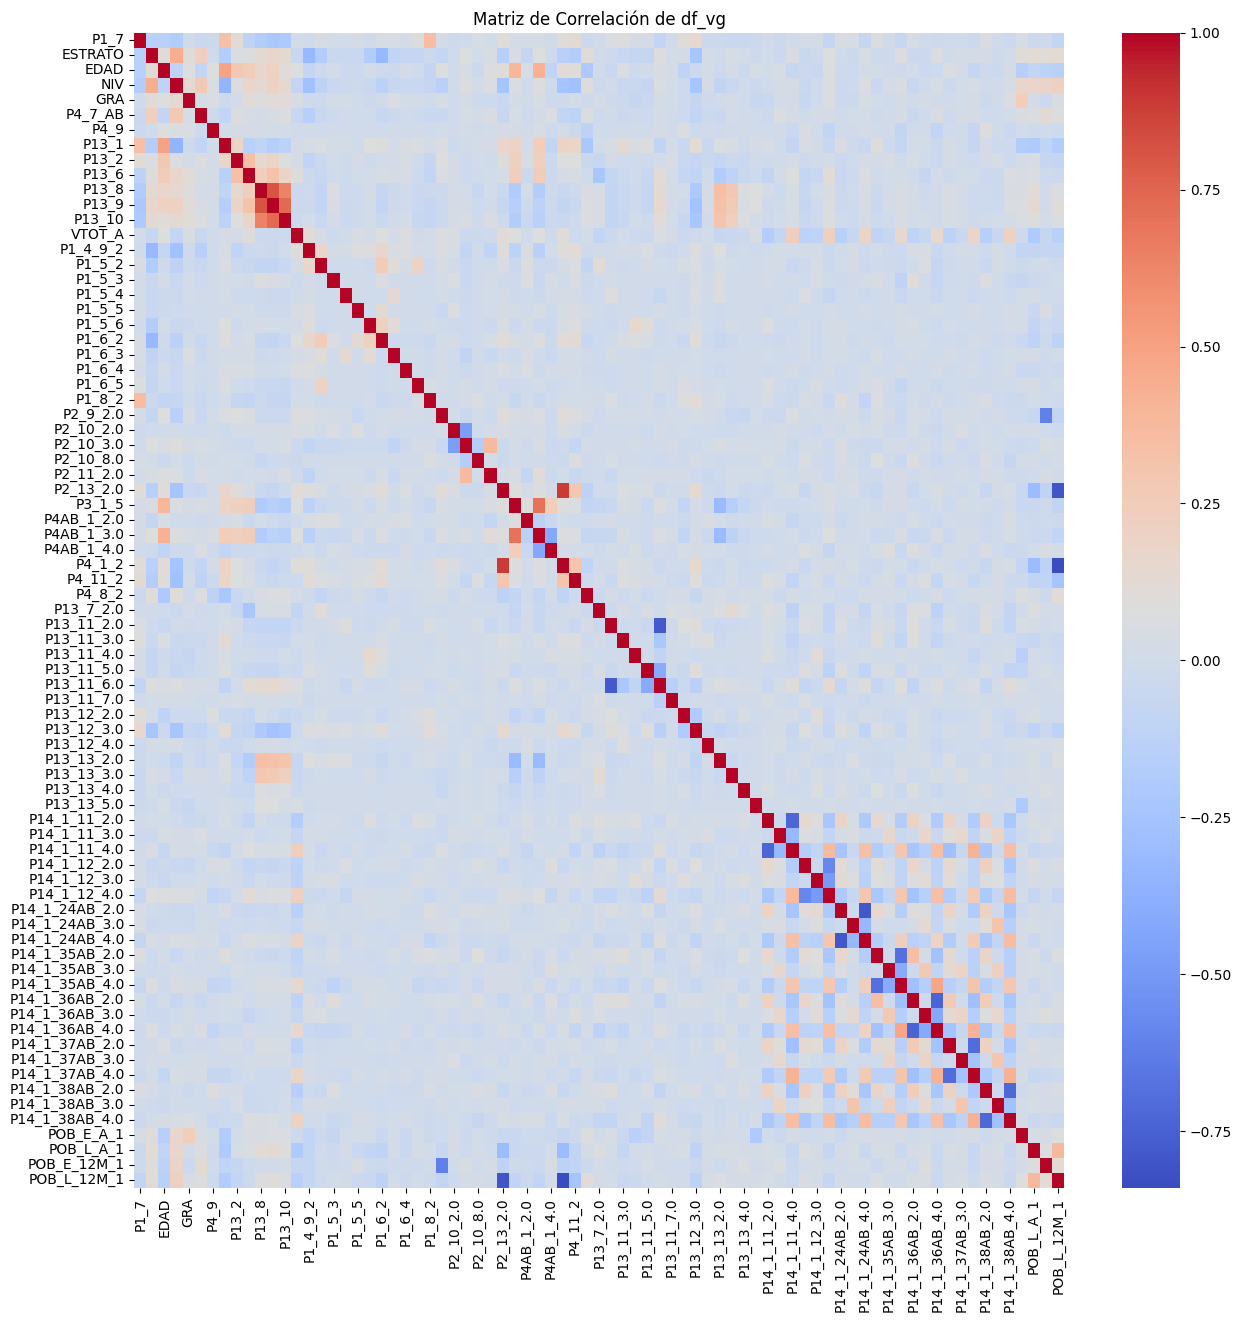

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_vg_with_dummies.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación de df_vg")
plt.show()



## **hallazgos en la grafica**


**Correlaciones Fuertes:** Los cuadros que aparecen en rojo oscuro indican una correlación fuerte y positiva entre las variables.
Esto significa que cuando una variable aumenta, la otra también tiende a aumentar.

Si los cuadros rojos oscuros están en la diagonal, simplemente indican la correlación perfecta de una variable consigo misma.

**Correlaciones Débiles o Ninguna Correlación:** Los cuadros en tonos de azul representan una correlación débil o nula entre las variables. Esto sugiere que no hay una relación lineal fuerte entre estas variables.

**Correlaciones Negativas:**Si hubiera cuadros en tonos de azul oscuro fuera de la diagonal, indicarían una correlación negativa fuerte, lo que significa que cuando una variable aumenta, la otra tiende a disminuir.

**Patrones de Bloques:** Si se observan bloques de colores similares, esto podría indicar grupos de variables que se comportan de manera similar entre sí.

**Variables Independientes:** En un modelo de predicción, idealmente se prefieren variables que están correlacionadas con la variable objetivo pero no entre sí, para evitar multicolinealidad.

In [64]:
# Medidas descriptivas
descriptive_stats = df_vg_with_dummies.describe()

# Asimetría
skewness = df_vg_with_dummies.skew()

# Curtosis
kurtosis = df_vg_with_dummies.kurt()

In [67]:
print(descriptive_stats)
print(skewness)
print(kurtosis)

               P1_7       ESTRATO          EDAD           NIV           GRA  \
count  1.562000e+03  1.562000e+03  1.562000e+03  1.562000e+03  1.562000e+03   
mean  -5.686161e-17 -3.639143e-17  1.865061e-16  6.368501e-17  1.501147e-16   
std    1.000320e+00  1.000320e+00  1.000320e+00  1.000320e+00  1.000320e+00   
min   -1.236561e+00 -1.995992e+00 -2.008360e+00 -1.541667e+00 -2.475589e+00   
25%   -6.659532e-01 -6.327478e-01 -8.226553e-01 -4.879546e-01 -4.125248e-01   
50%   -9.534492e-02 -6.327478e-01 -1.112326e-01 -4.879546e-01 -4.125248e-01   
75%    4.752634e-01  7.304964e-01  6.792372e-01 -1.367172e-01  9.628513e-01   
max    1.074621e+01  2.093741e+00  3.445881e+00  2.321944e+00  3.025916e+00   

            P4_7_AB          P4_9         P13_1         P13_2         P13_6  \
count  1.562000e+03  1.562000e+03  1.562000e+03  1.562000e+03  1.562000e+03   
mean   9.097858e-18  9.097858e-18 -6.823394e-17 -1.728593e-16  2.547400e-16   
std    1.000320e+00  1.000320e+00  1.000320e+00  1.

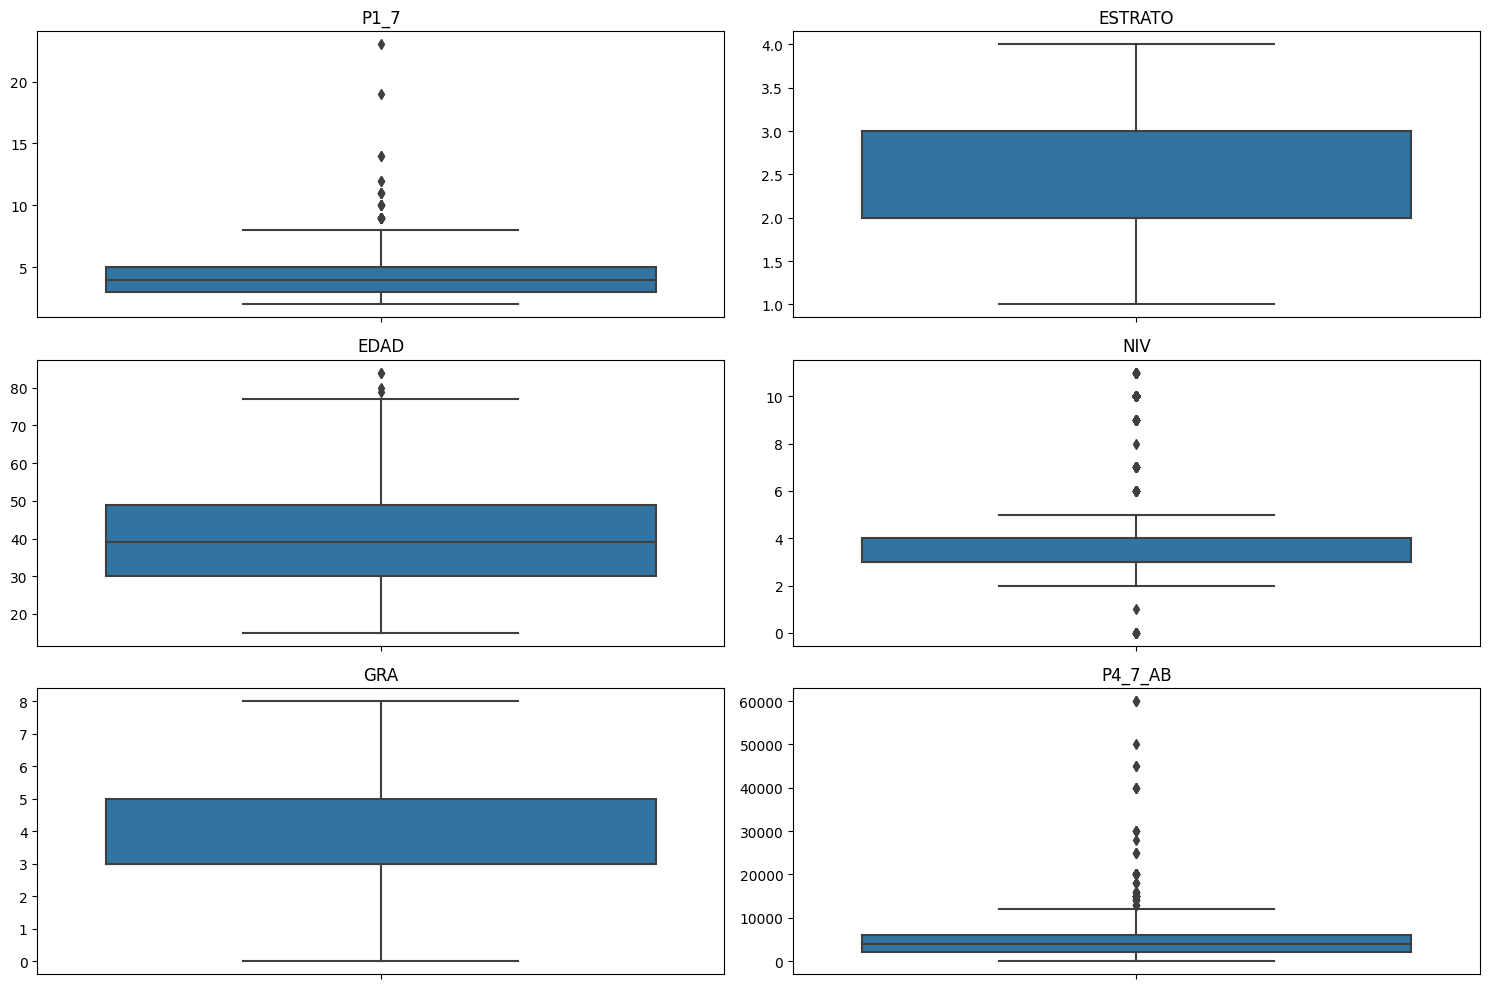

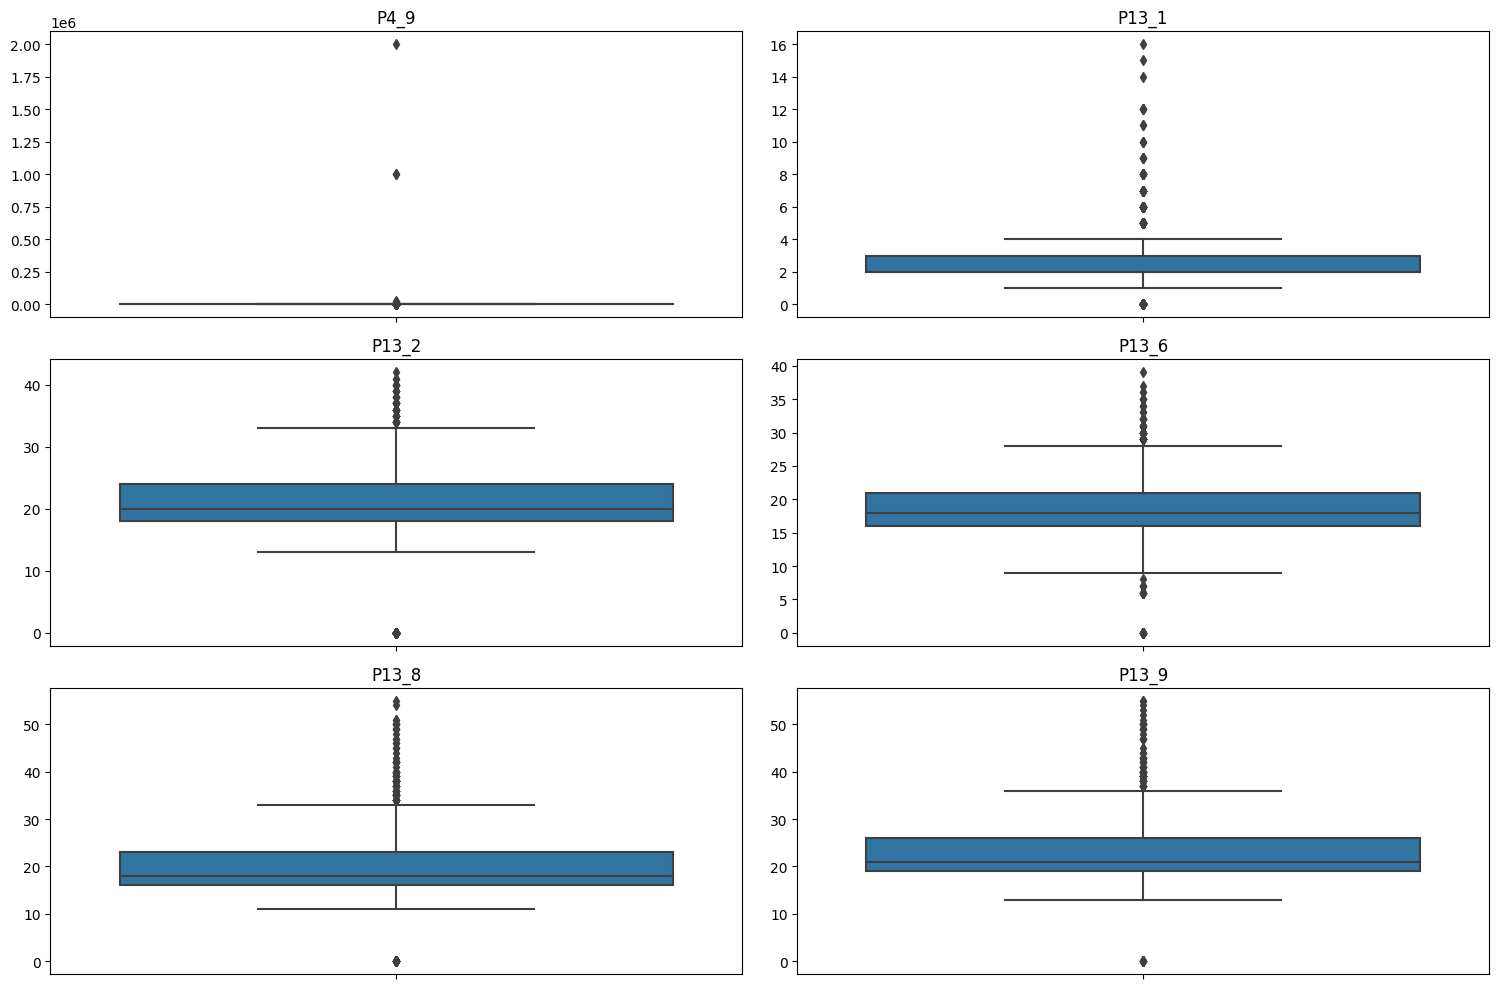

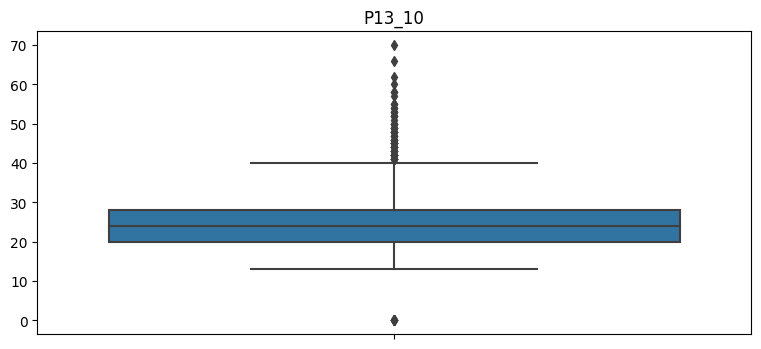

In [49]:
import numpy as np

columnas_seleccionadas = [
    'P1_7', 'ESTRATO', 'EDAD', 'NIV', 'GRA', 'P4_7_AB',
    'P4_9', 'P13_1', 'P13_2', 'P13_6', 'P13_8', 'P13_9',
    'P13_10'
]

# Seleccionar solo las columnas deseadas de df_vg y guardarlas en un nuevo DataFrame
df_numeric = df_vg_with_dummies[columnas_seleccionadas].copy()

# Definir cuántas variables por figura
variables_por_figura = 6

# Calcular cuántas figuras son necesarias
total_figuras = int(np.ceil(df_numeric.shape[1] / variables_por_figura))

for i in range(total_figuras):
    # Iniciar una nueva figura
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # Tamaño ajustable según sea necesario
    # Aplanar el array de axes para facilitar la iteración
    axes = axes.flatten()

    # Calcular el índice de inicio y fin para las columnas de esta figura
    inicio = i * variables_por_figura
    fin = inicio + variables_por_figura

    # Iterar sobre cada conjunto de columnas y crear un boxplot para cada una
    for j, col in enumerate(df_numeric.columns[inicio:fin]):
        sns.boxplot(y=df_numeric[col], ax=axes[j])
        axes[j].set_title(col)
        axes[j].set_ylabel('')  # Eliminar el eje y para limpiar la figura

    # Ocultar los axes adicionales que no se usan
    for k in range(j + 1, len(axes)):
        axes[k].set_visible(False)

    # Ajustar el layout y mostrar la figura actual
    plt.tight_layout()
    plt.show()

In [50]:
#%%Evaluar OUTLIERS
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = column[((column < (Q1 - 1.5 * IQR)) |(column > (Q3 + 1.5 * IQR)))]
    return outliers

# Lista de columnas seleccionadas para detectar outliers
columnas_seleccionadas = [
    'P1_7', 'ESTRATO', 'EDAD', 'NIV', 'GRA', 'P4_7_AB',
    'P4_9', 'P13_1', 'P13_2', 'P13_6', 'P13_8', 'P13_9',
    'P13_10'
]

# Aplicar la función solo a las columnas seleccionadas y guardar la cantidad de outliers
outlier_counts = {column: len(detect_outliers(df_vg_with_dummies[column])) for column in columnas_seleccionadas}

# Ordenar y guardar la cantidad de outliers por columna de mayor a menor
outlier_counts = dict(sorted(outlier_counts.items(), key=lambda item: item[1], reverse=True))

# Imprimir la cantidad de outliers por columna
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")
#Se mantienen todos los outliers,  porque no se observa que sea datos erroneos.

NIV: 371 outliers
P13_1: 303 outliers
P4_9: 209 outliers
P13_2: 194 outliers
P13_8: 122 outliers
P13_9: 88 outliers
P13_6: 87 outliers
P4_7_AB: 81 outliers
P13_10: 81 outliers
P1_7: 34 outliers
EDAD: 4 outliers
ESTRATO: 0 outliers
GRA: 0 outliers


In [51]:
#%% Estandarizar variables ordinales
from sklearn.preprocessing import StandardScaler

# Lista de columnas seleccionadas para estandarizar
columnas_seleccionadas = [
    'P1_7', 'ESTRATO', 'EDAD', 'NIV', 'GRA', 'P4_7_AB',
    'P4_9', 'P13_1', 'P13_2', 'P13_6', 'P13_8', 'P13_9',
    'P13_10'
]

# Crear el StandardScaler object
scaler = StandardScaler()

# Asumiendo que 'df_vg' es tu DataFrame original y está cargado

# Aplicar el escalador solo a las columnas seleccionadas
df_vg_with_dummies[columnas_seleccionadas] = scaler.fit_transform(df_vg_with_dummies[columnas_seleccionadas])

# Verificamos las primeras filas del dataframe para confirmar la estandarización
print(df_vg_with_dummies[columnas_seleccionadas].head())

       P1_7   ESTRATO      EDAD       NIV       GRA   P4_7_AB      P4_9  \
0  0.475263 -0.632748 -0.190280 -0.487955 -0.412525  0.531048 -0.047069   
1 -1.236561 -0.632748 -1.217890 -0.136717 -0.412525 -0.485913 -0.047069   
2 -1.236561 -0.632748  0.995425 -0.487955 -0.412525 -0.667514 -0.047069   
3 -0.095345 -0.632748 -0.348373  0.916995 -0.412525  0.167848 -0.047069   
4  2.757696 -0.632748  0.916378 -0.839192  1.650539  0.385768 -0.047069   

      P13_1     P13_2     P13_6     P13_8     P13_9    P13_10  
0  0.221589 -0.251924 -0.419587  2.464606  2.191826  3.023791  
1 -1.450500 -2.496962  0.216102 -0.025775 -0.160883 -0.317722  
2  0.778952  0.371698  0.639894  4.124860  3.956357  5.964322  
3 -0.335774  0.621146  1.063687  0.527643  0.133206 -0.852364  
4  0.778952  0.122249  0.216102 -0.717548 -0.454971 -0.718703  


In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_vg_with_dummies.drop('VTOT_A', axis=1)
y = df_vg_with_dummies['VTOT_A']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Parámetros para el Grid Search
param_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 30],
            'kernel': ['rbf', 'linear']
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, None]
        }
    },
    'BaggingClassifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'base_estimator': [DecisionTreeClassifier(max_depth=20)]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'max_depth': [5, 10, 15,  None]
        }
    }
}

scores = []
for model_name, mp in param_grid.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Encontrar el mejor modelo general
best_model_info = max(scores, key=lambda x: x['best_score'])
print(f"Mejor Modelo: {best_model_info['model']}")
print(f"Mejor puntaje (Accuracy): {best_model_info['best_score']}")
print(f"Mejor configuración: {best_model_info['best_params']}")

# Clasificar con el mejor modelo
best_model_class = param_grid[best_model_info['model']]['model'].__class__
best_model = best_model_class(**best_model_info['best_params'])
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejor Modelo: SVM
Mejor puntaje (Accuracy): 0.7182313267144234
Mejor configuración: {'C': 10, 'kernel': 'linear'}
Accuracy en el conjunto de prueba: 0.7654584221748401


Mejor Modelo: SVM

Mejor puntaje (Accuracy): 0.7182313267144234

Mejor configuración: {'C': 10, 'kernel': 'linear'}

Accuracy en el conjunto de prueba: 0.7654584221748401

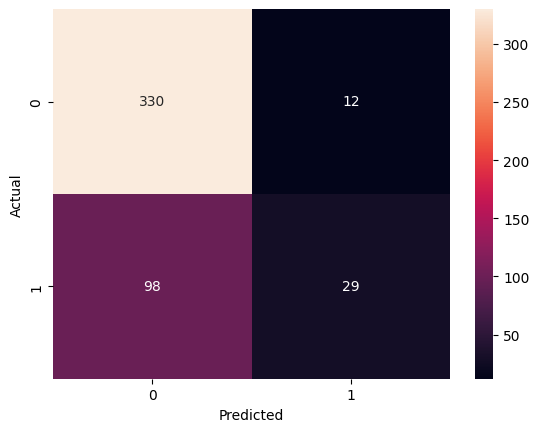

In [54]:
#%%
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretacion de Matriz de confusion:**
Verdaderos positivos (TP): La celda inferior derecha (con el número 29) muestra el número de casos positivos (1) que fueron correctamente identificados por el modelo.

Falsos positivos (FP): La celda superior derecha (con el número 12) muestra el número de casos negativos (0) que fueron incorrectamente identificados como positivos (1) por el modelo.

Verdaderos negativos (TN): La celda superior izquierda (con el número 330) muestra el número de casos negativos (0) que fueron correctamente identificados por el modelo.

Falsos negativos (FN): La celda inferior izquierda (con el número 98) muestra el número de casos positivos (1) que fueron incorrectamente identificados como negativos (0) por el modelo.

**Conclusion**

En resumen, la matriz muestra que el modelo es bastante conservador al predecir la clase positiva (1), con muchos más falsos negativos que falsos positivos. Esto podría ser indicativo de un modelo que tiene un umbral alto para predecir la clase positiva, o que simplemente es más preciso al predecir la clase negativa en comparación con la clase positiva.

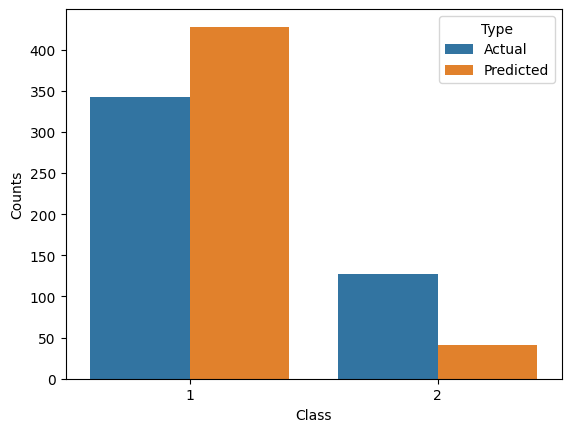

In [55]:
#%%
import pandas as pd

# Convertir a DataFrame para facilitar la manipulación
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Conteo de clases
class_counts = df_comparison.melt(var_name='Type', value_name='Class').groupby(['Type', 'Class']).size().reset_index(name='Counts')

# Gráfico de barras
sns.barplot(x='Class', y='Counts', hue='Type', data=class_counts)
plt.show()


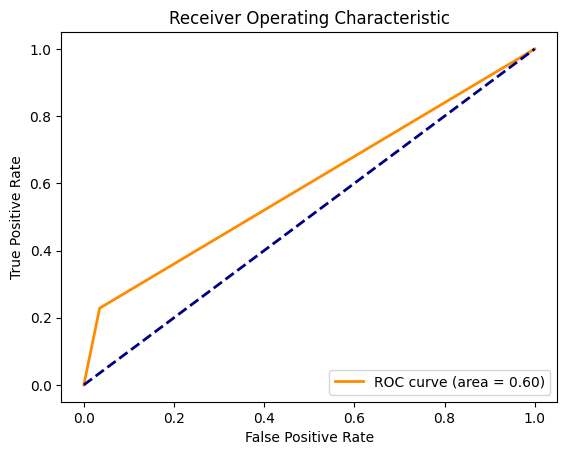

In [56]:
from sklearn.metrics import roc_curve, auc
y_test_roc = (y_test - 1)
y_pred_roc = (y_pred - 1)

# Calculando la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_roc)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Analisis de la Grafica ROC**

***Eje X*** (Tasa de Falsos Positivos): Muestra la proporción de resultados negativos reales que se clasificaron incorrectamente como positivos. Va de 0 a 1, y un modelo ideal tendría una tasa de falsos positivos de 0.

***Eje Y*** (Tasa de Verdaderos Positivos): Muestra la proporción de resultados positivos reales que se clasificaron correctamente. También va de 0 a 1, y un modelo ideal tendría una tasa de verdaderos positivos de 1.

La curva ROC que muestras tiene un AUC de 0,60, lo que indica que el modelo tiene una capacidad de discriminación limitada, pero todavía es mejor que el azar. Un modelo ideal tendría la curva ROC más cerca de la esquina superior izquierda, maximizando la tasa de verdaderos positivos mientras minimiza la tasa de falsos positivos.

Volver a Correr los modelos pero tomado como metrica el valor ROC.

In [68]:
# Parámetros para el Grid Search
from sklearn.metrics import roc_auc_score
param_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 30],
            'kernel': ['rbf', 'linear']
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, None]
        }
    },
    'BaggingClassifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'base_estimator': [DecisionTreeClassifier(max_depth=20)]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'max_depth': [5, 10, 15,  None]
        }
    }
}

scores = []
for model_name, mp in param_grid.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='roc_auc', n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Encontrar el mejor modelo general basado en AUC
best_model_info = max(scores, key=lambda x: x['best_score'])
print(f"Mejor Modelo: {best_model_info['model']}")
print(f"Mejor puntaje (AUC): {best_model_info['best_score']}")
print(f"Mejor configuración: {best_model_info['best_params']}")

# Clasificar con el mejor modelo
best_model_class = param_grid[best_model_info['model']]['model'].__class__
best_model = best_model_class(**best_model_info['best_params'])
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba y calcular AUC
y_pred_proba = best_model.predict_proba(X_test)[:,1] # Obtener probabilidades para la clase positiva
y_pred_accuracy = best_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC en el conjunto de prueba: {auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejor Modelo: LogisticRegression
Mejor puntaje (AUC): 0.7540134937626967
Mejor configuración: {'C': 20}
AUC en el conjunto de prueba: 0.7463738085370908


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor Modelo: LogisticRegression

Mejor puntaje (AUC): 0.7540134937626967

Mejor configuración: {'C': 20}

AUC en el conjunto de prueba: 0.7463738085370908

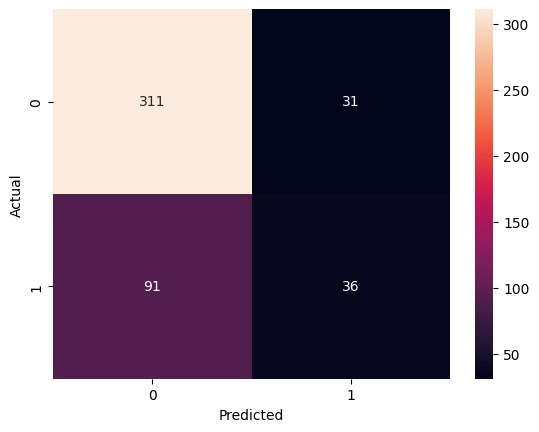

In [69]:
#%%
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_accuracy)

# Visualizando la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

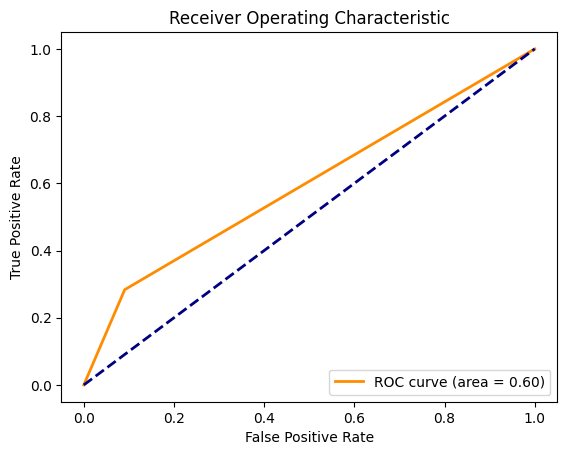

In [70]:
from sklearn.metrics import roc_curve, auc
y_test_roc = (y_test - 1)
y_pred_roc = (y_pred_accuracy - 1)

# Calculando la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_roc)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()